## Group 56  
## Problem Statement Assignment_1_PS-3


## Contributors
| **Name**               | **BITS ID**     | **Contributions** |
|-------------------------|-----------------|-------------------|
| SUBHASIS CHAKRABORTY    | 2023 AC 05309   | 100 %               |
| SANJIT CHANDA           | 2023 AC 05480   | 100 %             |
| LALITHA SHREE V         | 2023 AC 05278   | 100 %             |
| REVATHI P               | 2023 AD 05044   | 100 %             |
| RAMYA S                 | 2023 AC 05705   | 100 %             |

### Assignment_1_PS-3

NLP Assignment 1

General Instructions

Each group is expected to submit a jupyter notebook (.ipynb) and a pdf file of the same. 

Each output generated should be justified.

No extension on the deadline

Submissions using other python IDEs will not be considered for grading.




Perform the following tasks using the given dataset

Dataset : 


https://drive.google.com/file/d/1QS50opZIGIQ2TaiCNBk4z8pw_mypSibM/view?usp=sharing




(Consider the text column that represents a review in the dataset) 


Prepare the dataset for the algorithm by:

Cleaning: Removing punctuation, numbers, and special characters. Eliminating stop words.                    

Normalization: Reducing words to their base or root  form using stemming or lemmatization                                  (1M)

Apply a POS tagging algorithm or utilize a pretrained POS tagger to assign POS tags to the words in the dataset.

(a) Determine the frequency of each POS tag across the entire dataset.

(b)Identify and present the top 10 most frequent POS tags and their respective frequencies.

(c) Analyze the common word combinations and patterns surrounding the most frequent POS tags (e.g., "adjective + noun", "verb + prepositional phrase").          (2 Marks)

Generate visualizations such as bar charts, word clouds to represent the POS tag frequencies                                 (2 Marks)

Display the HMM POS tagging on the first 4 rows of the dataset        (2 Marks)

a) Choose a subset of the dataset (e.g., a paragraph or a set of sentences) and apply both POS tagging and NER to this subset. 

(b) Create a table that displays each word in the subset along with its POS tag and NER tag (if applicable). 

(c) Identify the instances where POS tags and NER tags appear to contradict each other or provide mutually supportive information. Justify how these observed relationships can be leveraged to enhance the accuracy and depth of text analysis tasks                                               (3 Marks)





Justification of the output obtained for all the above tasks is mandatory



In [26]:
# Installation of nltk
!pip install nltk

#import nltk library for using its different functions
import nltk

import re

# for loading the csv
import pandas as pd

# for removing stopwords
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Subhasis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Subhasis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Cleaning: Removing punctuation, numbers, and special characters. Eliminating stop words.  

In [27]:
# Cleaning: Removing punctuation, numbers, and special characters. Eliminating stop words.  

def clean_dataset(text):
    if not isinstance(text, str): # Ensure the text is a string
        return ""
    
    # define stop words
    stop_words = set(stopwords.words('english'))

    # remove special characters, numbers and punctuations
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # tokenize text
    words = nltk.word_tokenize(text)

    # remove stop words
    words = [word.lower() for word in words if word.lower() not in stop_words ]

    # join cleaned words
    return ' '.join(words)

### Normalization: Reducing words to their base or root  form using stemming or lemmatization 

In [28]:


from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
# using omw-1.4 
# to improve lemmatization accuracy and handle nuanced linguictic cases
# to work with datasets in languages other than English
# to maintain compatibility with the latest featres of WordNet in NLTK
nltk.download('omw-1.4')

def normalize_dataset(text):
    lemmatizer = WordNetLemmatizer()

    # tokenize text
    words = nltk.word_tokenize(text)

    # lemmatize each word
    normalized_words = [ lemmatizer.lemmatize(word) for word in words ]

    # join normalised words
    return ' '.join(normalized_words)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Subhasis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Subhasis\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Apply a POS tagging algorithm or utilize a pretrained POS tagger to assign POS tags to the words in the dataset.

In [29]:

nltk.download('averaged_perceptron_tagger')

def pos_tagging(text):
    tokens = nltk.word_tokenize(text)
    return nltk.pos_tag(tokens)

# we are directly using nltk pos_tag after tokenising to reduce repetitive generation of tokens

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Subhasis\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [30]:
# loading the dataset

data =  pd.read_csv('boston airbnb reviews.csv')
print(data.head())

   listing_id       id  reviewer_id reviewer_name  \
0     1178162  4724140      4298113       Olivier   
1     1178162  4869189      6452964     Charlotte   
2     1178162  5003196      6449554     Sebastian   
3     1178162  5150351      2215611        Marine   
4     1178162  5171140      6848427        Andrew   

                                            comments  
0  My stay at islam's place was really cool! Good...  
1  Great location for both airport and city - gre...  
2  We really enjoyed our stay at Islams house. Fr...  
3  The room was nice and clean and so were the co...  
4  Great location. Just 5 mins walk from the Airp...  


In [31]:
# This model is essential for tokenizing text into sentences or words using NLTK
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

# apply cleaning
data['cleaned_comments'] = data['comments'].apply(clean_dataset)

# apply normalisation
data['normalized_comments'] = data['cleaned_comments'].apply(normalize_dataset)


# apply POS tagging
# data['pos_tags'] = data['normalized_comments'].apply(pos_tagging)

# tokenise once
data['tokens'] = data['normalized_comments'].apply(nltk.word_tokenize)
# Use tokens for POS tagging
data['pos_tags'] = data['tokens'].apply(nltk.pos_tag)

# display the updated dataset
print(data[['comments', 'cleaned_comments', 'normalized_comments', 'pos_tags']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Subhasis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Subhasis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Subhasis\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


                                            comments  \
0  My stay at islam's place was really cool! Good...   
1  Great location for both airport and city - gre...   
2  We really enjoyed our stay at Islams house. Fr...   
3  The room was nice and clean and so were the co...   
4  Great location. Just 5 mins walk from the Airp...   

                                    cleaned_comments  \
0  stay islams place really cool good location mi...   
1  great location airport city great amenities ho...   
2  really enjoyed stay islams house outside house...   
3  room nice clean commodities close airport metr...   
4  great location mins walk airport station good ...   

                                 normalized_comments  \
0  stay islam place really cool good location min...   
1  great location airport city great amenity hous...   
2  really enjoyed stay islam house outside house ...   
3  room nice clean commodity close airport metro ...   
4  great location min walk airport station goo

In [32]:
# To reduce execution time for pos_tagging also tried with 
# applying batch pos tagging
# using parallel processing
# used space with en_core_web_sm

#### (a) Determine the frequency of each POS tag across the entire dataset.

In [33]:
from collections import Counter
#import nltk

# flatten the list of tags across all rows in dataset
all_tags = [tag for row in data['pos_tags'] for _, tag in row]

# count frequency of each POS tag
pos_freq = Counter(all_tags)

# Display the frequency of each POS tag
print("POS Tag frequencies: ", pos_freq) 


POS Tag frequencies:  Counter({'NN': 987806, 'JJ': 540543, 'RB': 188875, 'VBD': 104367, 'VBG': 81143, 'VB': 58756, 'VBP': 55934, 'VBN': 54911, 'IN': 49769, 'NNS': 36391, 'MD': 27834, 'FW': 20618, 'CD': 14834, 'JJS': 9117, 'VBZ': 8869, 'JJR': 6774, 'RBR': 4402, 'DT': 4237, 'CC': 2602, 'RP': 2193, 'NNP': 2013, 'WP': 673, 'PRP': 615, 'RBS': 502, 'WRB': 482, 'EX': 425, 'WDT': 265, 'PRP$': 124, 'TO': 122, 'UH': 57, 'WP$': 40, 'PDT': 10, 'POS': 6, 'SYM': 5, '$': 4, 'NNPS': 2})


#### (b) Identify and Present the Top 10 Most Frequent POS Tags

Top 10 POS Tags and Frequencies:
NN: 987806
JJ: 540543
RB: 188875
VBD: 104367
VBG: 81143
VB: 58756
VBP: 55934
VBN: 54911
IN: 49769
NNS: 36391


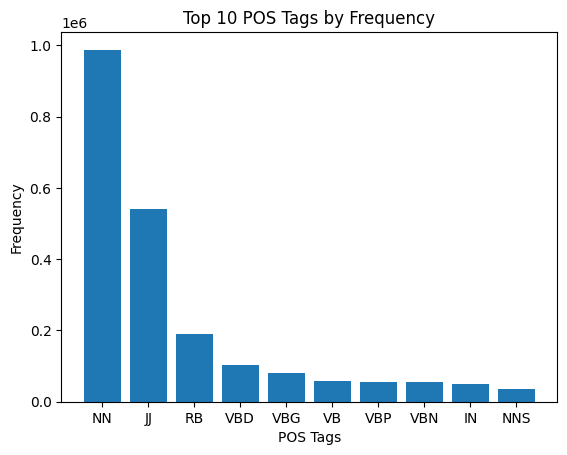

In [34]:
# Get the top 10 most frequent POS tags
top_10_tags = pos_freq.most_common(10)

# Display the top 10 tags and their frequencies
print("Top 10 POS Tags and Frequencies:")
for tag, freq in top_10_tags:
    print(f"{tag}: {freq}")

# visualisation 
import matplotlib.pyplot as plt

# Separate tags and frequencies for plotting
tags, frequencies = zip(*top_10_tags)

# Plot the bar chart
plt.bar(tags, frequencies)
plt.title("Top 10 POS Tags by Frequency")
plt.xlabel("POS Tags")
plt.ylabel("Frequency")
plt.show()

#### (c) Analyze the common word combinations and patterns surrounding the most frequent POS tags (e.g., "adjective + noun", "verb + prepositional phrase"). 

In [35]:

!pip install wordcloud
from wordcloud import WordCloud

In [36]:

# Extract adjacent POS tag combinations
def extract_combinations(tagged_sentence):
    combinations=[]
    for i in range(len(tagged_sentence) - 1):
        combinations.append(f"{tagged_sentence[i][1]} + {tagged_sentence[i+1][1]}")
    return combinations

# get all combinations from the dataset
all_combinations = []
for row in data["pos_tags"]:
    all_combinations.extend(extract_combinations(row))

# count the frequency of each combinations
comb_freq = Counter(all_combinations)

# Display the most common combinations
top_combinations = comb_freq.most_common(10)
print("Top 10 most common combinations:")
for combo, freq in top_combinations:
    print(f"{combo} : {freq}")


Top 10 most common combinations:
NN + NN : 414710
JJ + NN : 344602
NN + JJ : 179702
JJ + JJ : 105236
NN + RB : 88792
RB + JJ : 73749
NN + VBD : 71163
VBD + JJ : 46438
NN + VBG : 38351
VBG + NN : 36395


### Generate visualizations such as bar charts, word clouds to represent the POS tag frequencies     

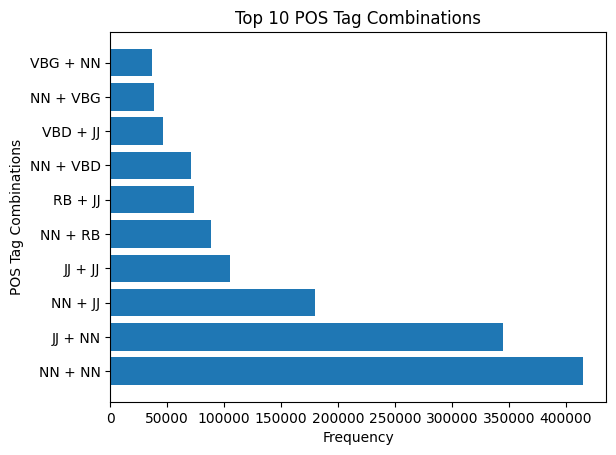

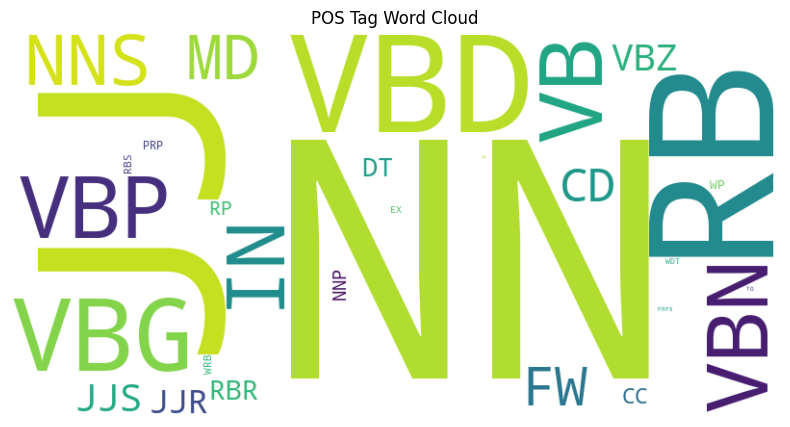

In [37]:
# Visualization
# Separate combinations and frequencies for plotting
combinations, comb_frequencies = zip(*top_combinations)

# Plot the bar chart
plt.barh(combinations, comb_frequencies)
plt.title("Top 10 POS Tag Combinations")
plt.xlabel("Frequency")
plt.ylabel("POS Tag Combinations")
plt.show()



# Generate a word cloud from POS tag frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(pos_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("POS Tag Word Cloud")
plt.show()

### Display the HMM POS tagging on the first 4 rows of the dataset 

In [38]:
import nltk
from nltk.tag.hmm import HiddenMarkovModelTrainer
from nltk.corpus import treebank

# Ensure required resources are available
nltk.download('treebank')
nltk.download('universal_tagset')

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\Subhasis\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\Subhasis\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [39]:
# Get the tagged sentences from the Treebank corpus with the Universal Tagset
tagged_sentences = treebank.tagged_sents(tagset='universal')

# Initialize HMM trainer
trainer = HiddenMarkovModelTrainer()

# Train the HMM tagger
hmm_tagger = trainer.train(tagged_sentences)


# Extract the first 4 rows of normalized comments
first_4_rows = data['normalized_comments'][:4]

# Tokenize and apply the HMM tagger
hmm_pos_tags = first_4_rows.apply(lambda text: hmm_tagger.tag(nltk.word_tokenize(text)))

# Display the results
for i, (text, tags) in enumerate(zip(first_4_rows, hmm_pos_tags)):
    print(f"Row {i+1}:")
    print(f"Original Text: {text}")
    print(f"HMM POS Tags: {tags}")
    print("-" * 50)


c:\Users\Subhasis\miniconda3\Lib\site-packages\nltk\tag\hmm.py:335: RuntimeWarning: overflow encountered in cast
  O[i, k] = self._output_logprob(si, self._symbols[k])


Row 1:
Original Text: stay islam place really cool good location min away subway min downtown room nice place clean islam managed pretty well arrival even last minute recommand place airbnb user
HMM POS Tags: [('stay', 'VERB'), ('islam', 'NOUN'), ('place', 'NOUN'), ('really', 'NOUN'), ('cool', 'NOUN'), ('good', 'NOUN'), ('location', 'NOUN'), ('min', 'NOUN'), ('away', 'NOUN'), ('subway', 'NOUN'), ('min', 'NOUN'), ('downtown', 'NOUN'), ('room', 'NOUN'), ('nice', 'NOUN'), ('place', 'NOUN'), ('clean', 'NOUN'), ('islam', 'NOUN'), ('managed', 'NOUN'), ('pretty', 'NOUN'), ('well', 'NOUN'), ('arrival', 'NOUN'), ('even', 'NOUN'), ('last', 'NOUN'), ('minute', 'NOUN'), ('recommand', 'NOUN'), ('place', 'NOUN'), ('airbnb', 'NOUN'), ('user', 'NOUN')]
--------------------------------------------------
Row 2:
Original Text: great location airport city great amenity house plus islam always helpful even though away
HMM POS Tags: [('great', 'ADJ'), ('location', 'NOUN'), ('airport', 'NOUN'), ('city', 'NOU

c:\Users\Subhasis\miniconda3\Lib\site-packages\nltk\tag\hmm.py:363: RuntimeWarning: overflow encountered in cast
  O[i, k] = self._output_logprob(si, self._symbols[k])


#### a) Choose a subset of the dataset (e.g., a paragraph or a set of sentences) and apply both POS tagging and NER to this subset.  

In [40]:
import nltk
import spacy

# Ensure required resources are downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Load spaCy model for NER
nlp = spacy.load("en_core_web_sm")


# Example subset: First 2 rows from the comments column
subset = data['comments'][:2]
print("Selected Subset:")
print(subset)


# POS tagging function
def pos_tagging(text):
    tokens = nltk.word_tokenize(text)
    return nltk.pos_tag(tokens)

# Apply POS tagging to the subset
pos_tags = subset.apply(pos_tagging)
print("POS Tags for the Subset:")
for comment, tags in zip(subset, pos_tags):
    print(f"Comment: {comment}")
    print(f"POS Tags: {tags}")
    print("-" * 50)

# NER tagging function
def ner_tagging(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

# Apply NER tagging to the subset
ner_tags = subset.apply(ner_tagging)
print("NER Tags for the Subset:")
for comment, entities in zip(subset, ner_tags):
    print(f"Comment: {comment}")
    print(f"NER Tags: {entities}")
    print("-" * 50)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Subhasis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Subhasis\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Selected Subset:
0    My stay at islam's place was really cool! Good...
1    Great location for both airport and city - gre...
Name: comments, dtype: object
POS Tags for the Subset:
Comment: My stay at islam's place was really cool! Good location, 5min away from subway, then 10min from downtown. The room was nice, all place was clean. Islam managed pretty well our arrival, even if it was last minute ;) i do recommand this place to any airbnb user :)
POS Tags: [('My', 'PRP$'), ('stay', 'NN'), ('at', 'IN'), ('islam', 'NN'), ("'s", 'POS'), ('place', 'NN'), ('was', 'VBD'), ('really', 'RB'), ('cool', 'JJ'), ('!', '.'), ('Good', 'JJ'), ('location', 'NN'), (',', ','), ('5min', 'CD'), ('away', 'RB'), ('from', 'IN'), ('subway', 'NN'), (',', ','), ('then', 'RB'), ('10min', 'CD'), ('from', 'IN'), ('downtown', 'NN'), ('.', '.'), ('The', 'DT'), ('room', 'NN'), ('was', 'VBD'), ('nice', 'JJ'), (',', ','), ('all', 'DT'), ('place', 'NN'), ('was', 'VBD'), ('clean', 'JJ'), ('.', '.'), ('Islam', 'NNP'), (

#### (b) Create a table that displays each word in the subset along with its POS tag and NER tag (if applicable). 

In [41]:
def ner_tagging(text):
    doc = nlp(text)
    # Create a dictionary mapping each word to its NER label
    return {ent.text: ent.label_ for ent in doc.ents}

# Process each comment in the subset
results = []
for comment in subset:
    pos_tags = pos_tagging(comment)
    ner_tags = ner_tagging(comment)
    
    # Combine POS and NER tags for each word
    for word, pos in pos_tags:
        ner = ner_tags.get(word, None)  # Retrieve NER tag if it exists
        results.append({'Word': word, 'POS': pos, 'NER': ner})

# Convert results into a DataFrame
result_df = pd.DataFrame(results)

# Display the combined table
print(result_df)

      Word   POS   NER
0       My  PRP$  None
1     stay    NN  None
2       at    IN  None
3    islam    NN   ORG
4       's   POS  None
..     ...   ...   ...
79    even    RB  None
80  though    IN  None
81      he   PRP  None
82     was   VBD  None
83    away    RB  None

[84 rows x 3 columns]


#### (c) Identify the instances where POS tags and NER tags appear to contradict each other or provide mutually supportive information. Justify how these observed relationships can be leveraged to enhance the accuracy and depth of text analysis tasks                                               (3 Marks)


In [42]:
# Analyze all POS and NER tag relationships
contradictions = []
mutual_support = []

for _, row in result_df.iterrows():
    word = row['Word']
    pos = row['POS']
    ner = row['NER']

    # Contradictions: POS and NER conflict
    if (
        # Generic noun or verb conflicting with named entities
        (pos in ['NN', 'NNS', 'VB', 'VBD', 'VBG', 'RB', 'JJ'] and ner in ['PERSON', 'ORG', 'GPE', 'DATE', 'MONEY', 'TIME']) or
        # Proper nouns not aligned with named entities
        (pos in ['NNP', 'NNPS'] and ner not in ['PERSON', 'ORG', 'GPE', 'LOC', 'FAC', 'PRODUCT', 'EVENT']) or
        # Numerals conflicting with non-quantitative entities
        (pos in ['CD'] and ner not in ['MONEY', 'PERCENT', 'QUANTITY', 'DATE', 'ORDINAL', 'CARDINAL'])
    ):
        contradictions.append({'Word': word, 'POS': pos, 'NER': ner, 'Type': 'Contradiction'})

    # Mutual Support: POS and NER align
    if (
        # Proper nouns aligning with named entities
        (pos in ['NNP', 'NNPS'] and ner in ['PERSON', 'ORG', 'GPE', 'LOC', 'FAC', 'PRODUCT', 'EVENT']) or
        # Quantifiers aligning with quantitative entities
        (pos in ['CD'] and ner in ['MONEY', 'PERCENT', 'QUANTITY', 'DATE', 'ORDINAL', 'CARDINAL']) or
        # Adjectives aligning with descriptive entities
        (pos in ['JJ'] and ner in ['NORP', 'PRODUCT', 'EVENT', 'LANGUAGE'])
    ):
        mutual_support.append({'Word': word, 'POS': pos, 'NER': ner, 'Type': 'Mutual Support'})

# Convert results into DataFrames for display
contradictions_df = pd.DataFrame(contradictions)
mutual_support_df = pd.DataFrame(mutual_support)

print("Contradictions:")
print(contradictions_df)

print("\nMutual Support:")
print(mutual_support_df)


Contradictions:
    Word  POS   NER           Type
0  islam   NN   ORG  Contradiction
1   5min   CD  None  Contradiction
2  Great  NNP  None  Contradiction

Mutual Support:
    Word  POS       NER            Type
0  10min   CD  CARDINAL  Mutual Support
1  Islam  NNP       ORG  Mutual Support
2  Islam  NNP       ORG  Mutual Support


### **Justification for Observed Relationships**

#### **1. Contradictions**
Contradictions occur when there is a misalignment between the **POS tag** and the **NER tag**, suggesting ambiguity or incorrect tagging. Each observed contradiction provides valuable insights into areas for refinement.

---

**Example 1**:  
- **Word**: `islam`  
- **POS**: `NN` (common noun)  
- **NER**: `ORG` (organization)  
- **Issue**:  
  The POS tag `NN` suggests a generic noun, whereas the NER tag `ORG` indicates that it is a named entity. This conflict could result from:
  - Incorrect tokenization or capitalization (e.g., "islam" vs. "Islam").
  - Ambiguity in the dataset (e.g., the context might not clearly indicate it as an organization).  
- **Resolution**:  
  Contradictions like these can prompt refinements in preprocessing, such as:
  - Capitalization-sensitive tokenization to differentiate `islam` (common noun) from `Islam` (proper noun or organization).
  - Dependency parsing to assess the word's role in its surrounding context.

---

**Example 2**:  
- **Word**: `5min`  
- **POS**: `CD` (cardinal number)  
- **NER**: `None`  
- **Issue**:  
  The POS tag identifies it as a numeric value, but the NER tag fails to classify it as a temporal entity (e.g., `TIME`). This could result from:
  - Inadequate recognition of shorthand notations like "5min" (vs. "5 minutes").
- **Resolution**:  
  Introduce domain-specific custom NER rules for abbreviations and shorthand formats.

---

**Example 3**:  
- **Word**: `Great`  
- **POS**: `NNP` (proper noun)  
- **NER**: `None`  
- **Issue**:  
  The POS tag suggests it is a proper noun (e.g., a name or title), but the absence of an NER tag indicates it is not identified as a named entity. This could result from:
  - A lack of context to confirm its role as a proper noun.
- **Resolution**:  
  Use surrounding context to refine NER models or downgrade the POS tag to `JJ` (adjective) if it describes a noun instead.

---

#### **How Contradictions Help**:
1. **Error Detection**:  
   Contradictions highlight preprocessing issues, such as improper tokenization, ambiguous capitalization, or domain-specific patterns (e.g., shorthand).  
2. **Refining Models**:  
   By addressing contradictions, we can train more accurate POS and NER models tailored to specific datasets or domains.  
3. **Improving Context Awareness**:  
   Leveraging contextual relationships (e.g., neighboring words, sentence structure) can resolve ambiguities and enhance entity disambiguation.

---

#### **2. Mutual Support**
Mutual support occurs when POS and NER tags align, confirming their roles in context. These reinforce confidence in tagging and entity recognition.

---

**Example 1**:  
- **Word**: `10min`  
- **POS**: `CD` (cardinal number)  
- **NER**: `CARDINAL`  
- **Strength**:  
  The alignment between `CD` and `CARDINAL` confirms that `10min` is correctly identified as a numerical value. This consistency validates the model’s ability to recognize shorthand formats.
- **Impact**:  
  Such alignments help extract structured data from unstructured text, such as durations, counts, and monetary values.

---

**Example 2**:  
- **Word**: `Islam`  
- **POS**: `NNP` (proper noun)  
- **NER**: `ORG` (organization)  
- **Strength**:  
  The POS tag `NNP` (proper noun) aligns with the NER tag `ORG`, reinforcing the identification of "Islam" as an organization in the given context.
- **Impact**:  
  Consistency between POS and NER tags improves confidence in entity recognition, aiding tasks like knowledge graph construction or semantic search.

---

#### **How Mutual Support Helps**:
1. **High-Confidence Tagging**:  
   Mutually supportive relationships enhance the reliability of POS and NER outputs, making downstream tasks more accurate.
2. **Semantic Enrichment**:  
   Consistent tagging allows for better context-aware understanding, enabling tasks like document classification, summarization, or entity-based recommendations.
3. **Structured Data Extraction**:  
   Mutual support simplifies extracting entities for structured datasets, improving integration with databases or knowledge graphs.

---

### **Applications of These Insights**

#### **1. Enhanced Contextual Understanding**
- **Contradictions**: Act as red flags to prompt model improvements, such as refining tokenization or disambiguation rules.  
- **Mutual Support**: Highlights high-confidence relationships that can be prioritized for downstream analysis.

#### **2. Improved Entity Disambiguation**
- Contradictions help refine rules for ambiguous cases (e.g., distinguishing "islam" as a noun vs. "Islam" as an organization).  
- Mutual support ensures accurate classification, reducing noise in entity-based applications like search engines or chatbots.

#### **3. Domain-Specific NLP Pipelines**
- Refine models to handle domain-specific patterns, such as shorthand (e.g., "5min") or contextual ambiguity.
- Use mutual support to train models for domain-specific tasks, like medical entity recognition or financial analysis.

---

### **Conclusion**
By analyzing contradictions and mutual support:
- **Contradictions** reveal weaknesses in preprocessing or model limitations, prompting improvements.  
- **Mutual Support** reinforces confidence in entity recognition and provides reliable input for downstream tasks.  

These insights enable **more accurate**, **context-aware**, and **robust NLP pipelines**, enhancing the depth of text analysis.